# Final Project: Video Game Sales 
$
\newcommand{\xv}{\mathbf{x}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\uv}{\mathbf{u}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\bv}{\mathbf{b}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Chi}{\mathcal{X}}
\newcommand{\R}{\rm I\!R}
\newcommand{\sign}{\text{sign}}
\newcommand{\Ym}{\mathbf{Y}}
\newcommand{\Tm}{\mathbf{T}}
\newcommand{\Xm}{\mathbf{X}}
\newcommand{\Wm}{\mathbf{W}}
\newcommand{\Zm}{\mathbf{Z}}
\newcommand{\Um}{\mathbf{U}}
\newcommand{\Vm}{\mathbf{V}}
\newcommand{\Am}{\mathbf{A}}
\newcommand{\muv}{\boldsymbol\mu}
\newcommand{\Sigmav}{\boldsymbol\Sigma}
\newcommand{\Lambdav}{\boldsymbol\Lambda}
$

## Utils

In [4]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_squared_error as mse

## Data Exploration and Analysis


#### Data Loading

In [7]:
vgs_df = pd.read_csv("video_games_sales.csv")

In [8]:
vgs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
vgs_df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [10]:
vgs_df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
vgs_df.isnull().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [12]:
# Dropping rows with null values
vgs_df.dropna()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [13]:
# Unique Values
for col in ['platform', 'genre', 'publisher']:
    print(vgs_df[col].value_counts())

platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64
genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64
publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New      

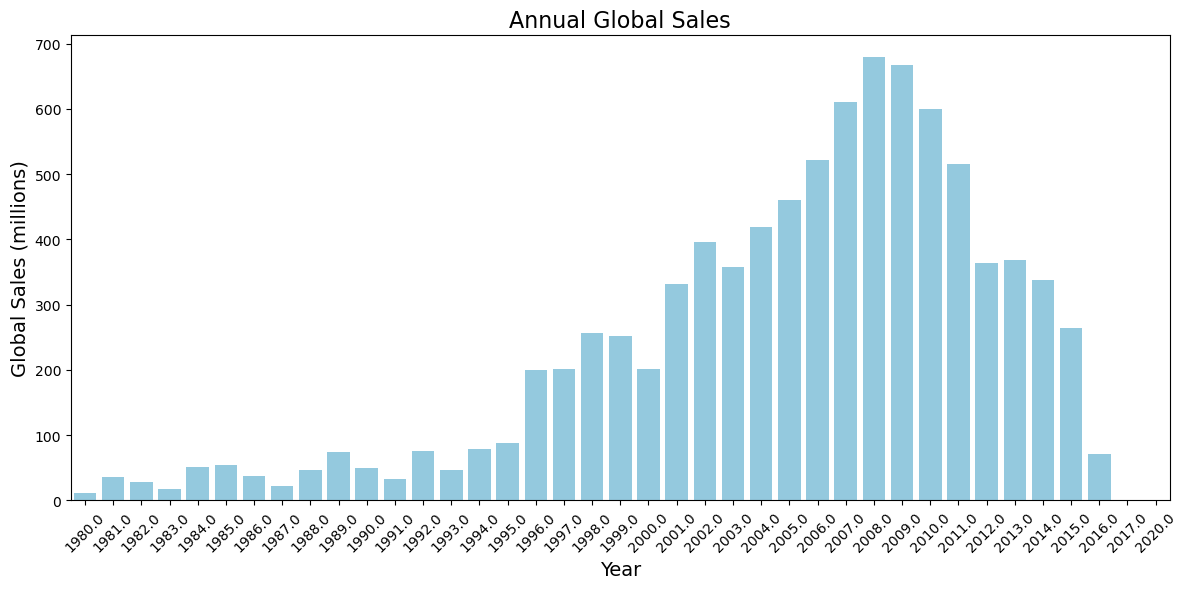

In [14]:
annual_sales = vgs_df.groupby('year').sum(numeric_only=True).reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(data=annual_sales, x='year', y='global_sales', color='skyblue')


plt.xlabel('Year', fontsize=14)
plt.ylabel('Global Sales (millions)', fontsize=14)
plt.title('Annual Global Sales', fontsize=16)
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

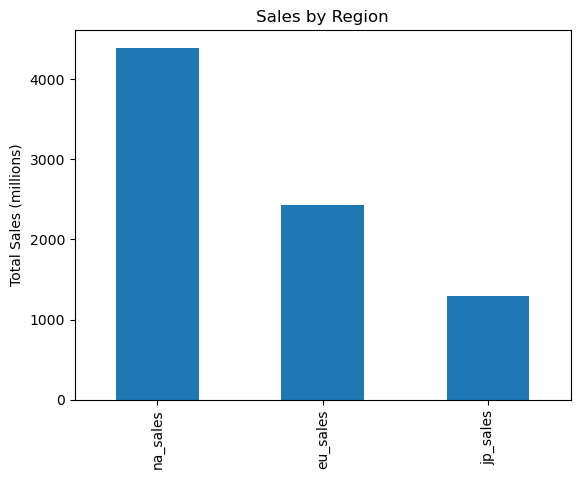

              na_sales  eu_sales  jp_sales  global_sales
na_sales      1.000000  0.767727  0.449787      0.941047
eu_sales      0.767727  1.000000  0.435584      0.902836
jp_sales      0.449787  0.435584  1.000000      0.611816
global_sales  0.941047  0.902836  0.611816      1.000000


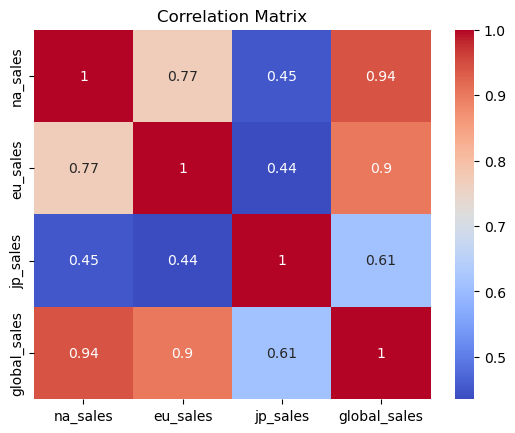

In [15]:
vgs_df[['na_sales', 'eu_sales', 'jp_sales']].sum().plot(kind='bar')
plt.ylabel('Total Sales (millions)')
plt.title('Sales by Region')
plt.show()

correlation_matrix = vgs_df[['na_sales', 'eu_sales', 'jp_sales', 'global_sales']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



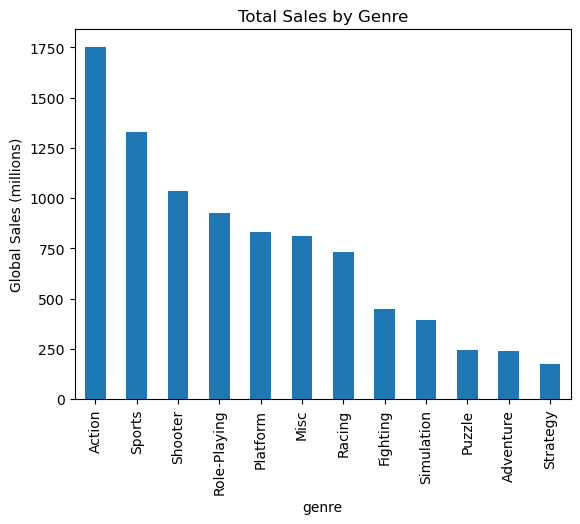

In [16]:
genre_sales = vgs_df.groupby('genre')['global_sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar')
plt.title('Total Sales by Genre')
plt.ylabel('Global Sales (millions)')
plt.show()


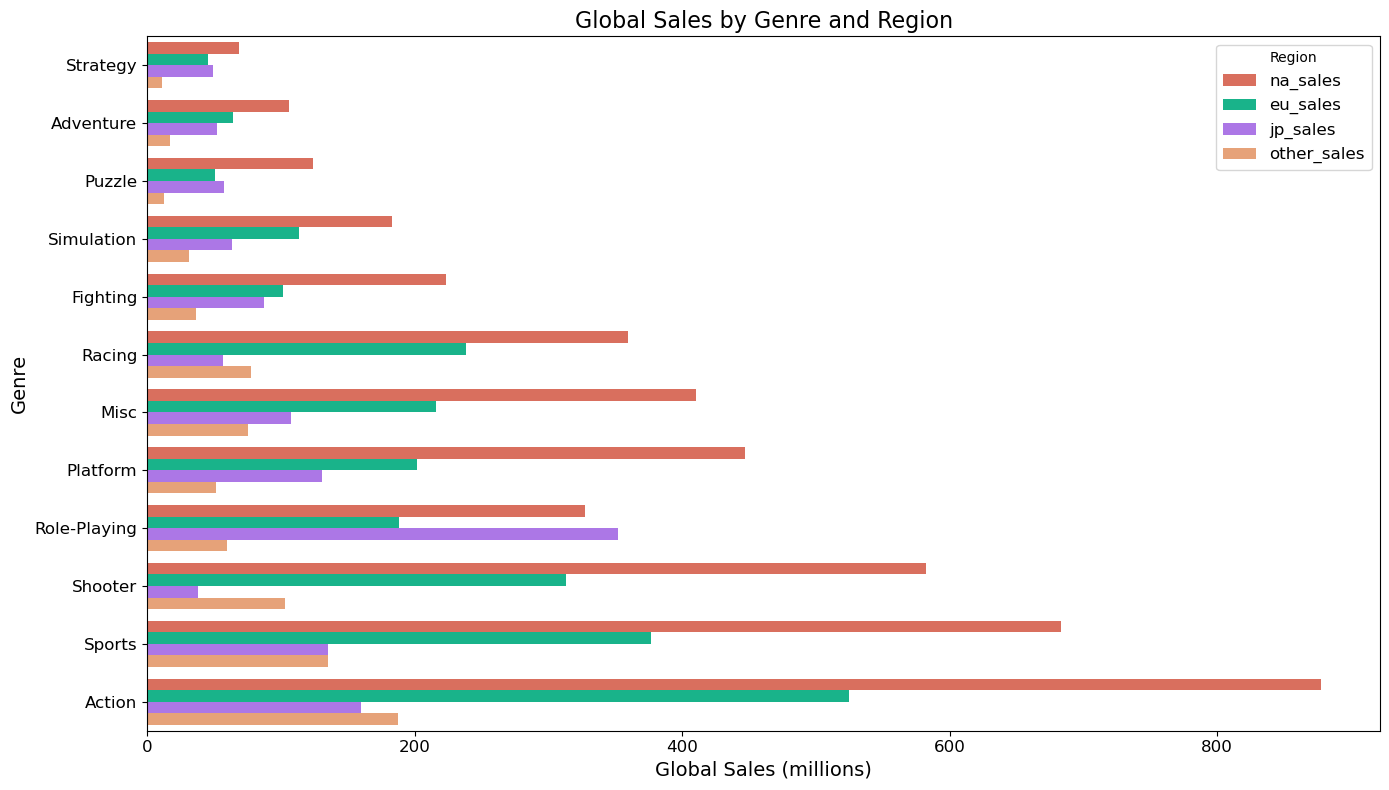

In [17]:
annual_sales1 = vgs_df.groupby(['genre']).sum(numeric_only=True).sort_values(['global_sales'], ascending=True).reset_index()


sales_long = annual_sales1.melt(id_vars='genre', 
                                 value_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
                                 var_name='region', 
                                 value_name='sales')


plt.figure(figsize=(14, 8))
sns.barplot(data=sales_long, x='sales', y='genre', hue='region', 
            palette={'na_sales': '#ee6049', 'eu_sales': '#00cc96', 
                     'jp_sales': '#ab64f9', 'other_sales': '#f89e67'})


plt.xlabel('Global Sales (millions)', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.title('Global Sales by Genre and Region', fontsize=16)
plt.legend(title='Region', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()

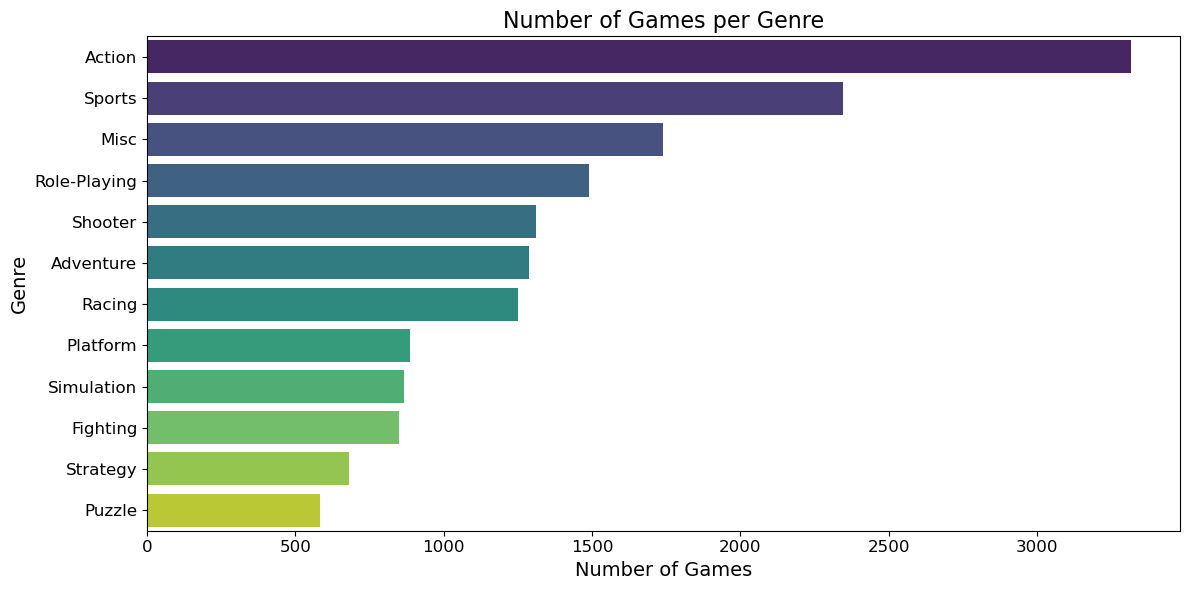

In [18]:
df_genre_counts = vgs_df['genre'].value_counts().reset_index()
df_genre_counts.columns = ['genre', 'counts']


plt.figure(figsize=(12, 6))
sns.barplot(data=df_genre_counts, x='counts', y='genre', palette='viridis', hue='genre')


plt.xlabel('Number of Games', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.title('Number of Games per Genre', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()

## Data Preprocessing

### Data Splitting

In [21]:
from sklearn.model_selection import train_test_split
def get_train_valid_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
    """ Randomizes and then splits the data into train, validation, and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

### Data Processing

In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

def get_preprocessed_data_KNN(vgs_df: pd.DataFrame) -> Tuple[np.ndarray, ...]:
    """Gets preprocessed data for training, validation, and testing.

    Args:
        vgs_df: DataFrame containing the video game sales data.

    Returns:
        A tuple of NumPy arrays: training data/targets, validation data/targets, and test data/targets.
    """
    # Exclude non-numeric columns and the target column for features
    numeric_features = ['rank', 'year', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']
    categorical_features = ['platform', 'genre', 'publisher']
    
    # Encode categorical features
    encoded_features = []
    for feature in categorical_features:
        le = LabelEncoder()
        vgs_df[feature] = le.fit_transform(vgs_df[feature])
        encoded_features.append(feature)
    
    # Combine numeric and encoded categorical features
    features = numeric_features + encoded_features
    X = vgs_df[features].values

    # Target is the sales_category column
    y = vgs_df['sales_category'].values

    # Split into train, validation, and test sets
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, y)

    # Normalize features using StandardScaler
    scaler = StandardScaler()
    X_trn = scaler.fit_transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

## K-Nearest Neighbor 

### Euclidean Distance Method

In [26]:
def euclidean_distance(x: np.ndarray, Y: np.ndarray) -> np.ndarray:
    """ Compute the euclidean distance between a row vectors or a vecotr and a matrix.
        Args:
            x: The 1st NumPy array given as a 1D vector or 2D row vector

            Y: The 2nd NumPy array given as a 2D row vector or 2D matrix

        Return:
            A 1D vector of flaots representing the distance between x and Y
    """
    assert len(Y.shape) == 2, f"y is a 1D vector, expected 2D row vector or matrix"
    dist = np.sqrt(np.sum((x-Y) ** 2, axis=1))
    return dist

### K-Nearest Neighbor Algorithm Class

In [28]:
class KNearestNeighbors():
    """
        Attributes:
            k: Number of nearest neighbors

            distance_measure: A python function reference which will compute a valid distance measure

            X: The training input features

            y: The training targets/labels
    """
    def __init__(self, k: int, distance_measure: Callable):
        """
            Args:
                k: Number of nearest neighbors

                distance_measure: A python function that computes a distance measure
        """
        self.k = k
        self.distance_measure = distance_measure
        self.X: np.ndarray = None
        self.y: np.ndarray = None
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """ Stores the training data for comparison 

            Args:
                X: Training data given as a 2D matrix

                y: Training labels given as a 1D vector
        """
        self.X = X
        self.y = y


    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Performs KNN using stored training data

            Args:
                X: Testing data given as a 2D matrix

            Return:
                Returns a 1D vector of predictions for each data sample in X
        """
        y_hats: list = []
        
        for sample in X:
            
            dist = self.distance_measure(sample, self.X)
            
            sort_dist = np.argsort(dist)[:self.k]
            
            labels = self.y[sort_dist]
            
            count = np.bincount(labels, minlength=np.max(self.y) + 1)
            
            frequent_label = np.argmax(count)
            y_hats.append(frequent_label)
        
        y_hats = np.array(y_hats)
        return y_hats

### K-Nearest Neighbor Performance Evaluation

Validation Accuracy: 0.973644578313253
Validation Classification Report:
              precision    recall  f1-score   support

         Low       0.98      0.99      0.99      2302
      Medium       0.91      0.87      0.89       319
        High       0.96      0.74      0.84        35

    accuracy                           0.97      2656
   macro avg       0.95      0.87      0.90      2656
weighted avg       0.97      0.97      0.97      2656

Test Accuracy: 0.9828313253012049
Test Classification Report:
              precision    recall  f1-score   support

         Low       0.99      1.00      0.99      2921
      Medium       0.94      0.89      0.92       352
        High       0.95      0.85      0.90        47

    accuracy                           0.98      3320
   macro avg       0.96      0.91      0.94      3320
weighted avg       0.98      0.98      0.98      3320



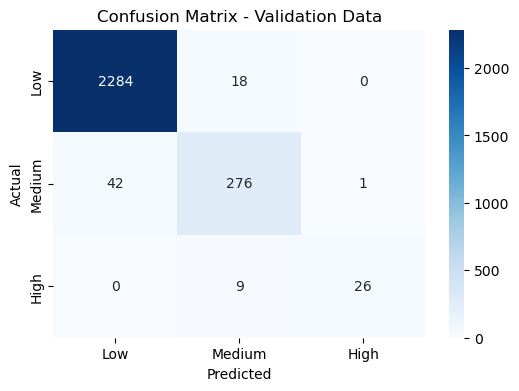

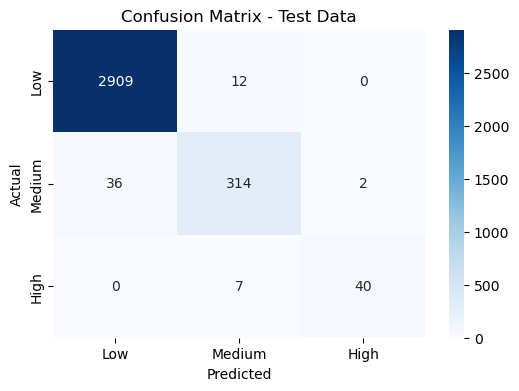

In [30]:
from sklearn.metrics import classification_report, accuracy_score

bins = [0, 1, 5, np.inf]  
labels = ['Low', 'Medium', 'High']  
vgs_df['sales_category'] = pd.cut(vgs_df['global_sales'], bins=bins, labels=labels)

# Encode categories to numerical labels
vgs_df['sales_category'] = vgs_df['sales_category'].cat.codes

# Split and preprocess data
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data_KNN(vgs_df)

# Initialize your KNN model
knn = KNearestNeighbors(k=3, distance_measure=euclidean_distance)

# Train the model
knn.fit(X_trn, y_trn.ravel())  # Fit the model

# Validate the model
y_pred = knn.predict(X_vld)
print("Validation Accuracy:", accuracy_score(y_vld, y_pred))
print("Validation Classification Report:")
print(classification_report(y_vld, y_pred, target_names=labels))

# Test the model
y_test_pred = knn.predict(X_tst)
print("Test Accuracy:", accuracy_score(y_tst, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_tst, y_test_pred, target_names=labels))


# Generate confusion matrix
cm = confusion_matrix(y_vld, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Validation Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Repeat for test data
cm_test = confusion_matrix(y_tst, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Data Preprocessing

### Data Splitting

In [33]:
def get_train_valid_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
    """ Randomizes and then splits the data into train, validation, and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

In [34]:
def get_preprocessed_data() -> Tuple[np.ndarray, ...]:
    """Gets preprocessed data for training, validation, and testing."""
    # Load your dataset (assuming vgs_df is already defined)
    X = vgs_df.iloc[:, :-1].copy()  # Exclude the target column
    y = vgs_df.iloc[:, -1].values   # Extract the target variable (global_sales)
    
    # Drop rows with NaN values
    X.dropna(inplace=True)
    y = y[X.index]  # Adjust target variable to match remaining rows
    
    # One-Hot Encoding for categorical columns
    X = pd.get_dummies(X, columns=['name', 'platform', 'genre', 'publisher'])
    
    # Split the data into train, validation, and test sets
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, y)

    # Scale the features
    scaler = StandardScaler()
    X_trn = scaler.fit_transform(X_trn)  # Fit and transform the training data
    X_vld = scaler.transform(X_vld)      # Transform the validation data
    X_tst = scaler.transform(X_tst)      # Transform the test data
    
    # Return the preprocessed data
    return X_trn, y_trn.reshape(-1, 1), X_vld, y_vld.reshape(-1, 1), X_tst, y_tst.reshape(-1, 1)

## Neural Networks

### Activation Functions

In [37]:
class Linear():
    @staticmethod
    def activation(z: np.ndarray) -> np.ndarray:  
        return z
    
    @staticmethod
    def derivative(z: np.ndarray) -> np.ndarray:
        return np.ones_like(z)

In [38]:
class Tanh():
    @staticmethod
    def activation(z: np.ndarray) -> np.ndarray:
        return np.tanh(z)

    @staticmethod
    def derivative(z: np.ndarray) -> np.ndarray:
        """ Computes the derivative of the tanh activation function """
        # TODO 4.2
        tanh_z = np.tanh(z)  
        return 1 - np.square(tanh_z)

In [39]:
def init_weights(
    n_input_features: int, 
    hidden_neurons: int, 
    output_neurons: int, 
) -> Tuple[np.ndarray, ...]:
    W1 = np.random.uniform(-0.5, 0.5, (n_input_features, hidden_neurons))
    W2 = np.random.uniform(-0.5, 0.5, (hidden_neurons, output_neurons))

    b1 = np.ones((1, hidden_neurons))
    b2 = np.ones((1, output_neurons))
    
    return W1, b1, W2, b2

In [40]:
def forward(
    X: np.ndarray, 
    W1: np.ndarray, 
    b1: np.ndarray,
    W2: np.ndarray, 
    b2: np.ndarray, 
) -> Tuple[np.ndarray, ...]:
    Z1, A1, Z2, A2 = None, None, None, None
    Z1 = X @ W1 + b1
    A1 = Tanh.activation(Z1)

    Z2 = A1 @ W2 + b2
    A2 = Linear.activation(Z2)
    
    return Z1, A1, Z2, A2

In [41]:
def output_layer_grads(
    X: np.ndarray,
    y: np.ndarray,
    W1: np.ndarray,
    Z1: np.ndarray,
    A1: np.ndarray,
    W2: np.ndarray,
    Z2: np.ndarray,
    A2: np.ndarray
) -> Tuple[np.ndarray, np.ndarray]:

    W2_avg_grad, b2_avg_grad = None, None
    m = X.shape[0]
    d2 = A2 - y
    W2_avg_grad = (A1.T @ d2) / m 
    b2_avg_grad = np.sum(d2, axis=0, keepdims=True) / m 
    
    return W2_avg_grad, b2_avg_grad

In [42]:
def hidden_layer_grads(
    X: np.ndarray,
    y: np.ndarray,
    W1: np.ndarray,
    Z1: np.ndarray,
    A1: np.ndarray,
    W2: np.ndarray,
    Z2: np.ndarray,
    A2: np.ndarray
) -> Tuple[np.ndarray, np.ndarray]:

    W1_avg_grad, b1_avg_grad = None, None
    m = X.shape[0]
    d2 = A2 - y
    d1 = (d2 @ W2.T) * Tanh.derivative(Z1)
    W1_avg_grad = (X.T @ d1) / m
    b1_avg_grad = np.sum(d1, axis=0, keepdims=True) / m
    
    return W1_avg_grad, b1_avg_grad

In [43]:
def plot_residuals(y_test, y_pred):
    """
    Plots residuals (actual - predicted) against actual values and predicted values.

    Parameters:
        y_test (np.ndarray): Array of actual values.
        y_pred (np.ndarray): Array of predicted values.
    """
    # Calculate residuals
    residuals = y_test - y_pred

    # Plot residuals against actual values
    plt.figure(figsize=(12, 6))

    # Subplot 1: Residuals vs Actual Values
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, residuals, alpha=0.5, label='Residuals', color='blue')
    plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
    plt.title('Residuals vs Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.legend()

    # Subplot 2: Residuals vs Predicted Values
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals, alpha=0.5, label='Residuals', color='green')
    plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
    plt.title('Residuals vs Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

### Neural Network Algorithm Class

In [45]:
def get_batches(
    data_len: int, 
    batch_size: int = 32,
) -> List[np.ndarray]:
   
    indices = np.arange(data_len)
    np.random.shuffle(indices)
    batches = [indices[i:i+batch_size] for i in range(0, data_len, batch_size)]

    return batches

In [46]:
class NeuralNetwork():
    def __init__(self,
        hidden_neurons: int,
        output_neurons: int,
        alpha: float, 
        batch_size: int,
        epochs: int = 1,
        seed: int = 0,
    ):
        
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.batch_size = batch_size
        self.alpha = alpha
        self.epochs = epochs
        self.seed = seed
        
        self.W1, self.b1 = None, None
        self.W2, self.b2 = None, None
        self.trn_error = None
        self.vld_error = None

    def fit(
        self,
        X: np.ndarray, 
        y: np.ndarray,
        X_vld: np.ndarray = None, 
        y_vld:np.ndarray = None,
    ): 
        
        np.random.seed(self.seed)
        self.trn_error = []
        self.vld_error = []
        
        input_features = X.shape[1] 
        self.W1, self.b1, self.W2, self.b2 = init_weights(input_features, self.hidden_neurons, self.output_neurons)
        
        for epoch in range(self.epochs):
            batches = get_batches(len(X), self.batch_size)
            
            for batch in batches:
                X_batch = X[batch]
                y_batch = y[batch]
                
                Z1, A1, Z2, A2 = forward(X_batch, self.W1, self.b1, self.W2, self.b2)
                
                W2_grad, b2_grad = output_layer_grads(X_batch, y_batch, self.W1, Z1, A1, self.W2, Z2, A2)
                W1_grad, b1_grad = hidden_layer_grads(X_batch, y_batch, self.W1, Z1, A1, self.W2, Z2, A2)
                
                self.W1 -= self.alpha * W1_grad
                self.b1 -= self.alpha * b1_grad
                self.W2 -= self.alpha * W2_grad
                self.b2 -= self.alpha * b2_grad
                
            _, _, _, A2_train = forward(X, self.W1, self.b1, self.W2, self.b2)
            train_rmse = np.sqrt(np.mean((A2_train - y) ** 2))
            self.trn_error.append(train_rmse)
    
            if X_vld is not None and y_vld is not None:
                _, _, _, A2_vld = forward(X_vld, self.W1, self.b1, self.W2, self.b2)
                val_rmse = np.sqrt(np.mean((A2_vld - y_vld) ** 2))
                self.vld_error.append(val_rmse)
        
        return self
    
    def predict(self, X: np.ndarray):
        _, _, _, A2 = forward(X, self.W1, self.b1, self.W2, self.b2)
        return A2

Test RMSE: 0.37405179656364324


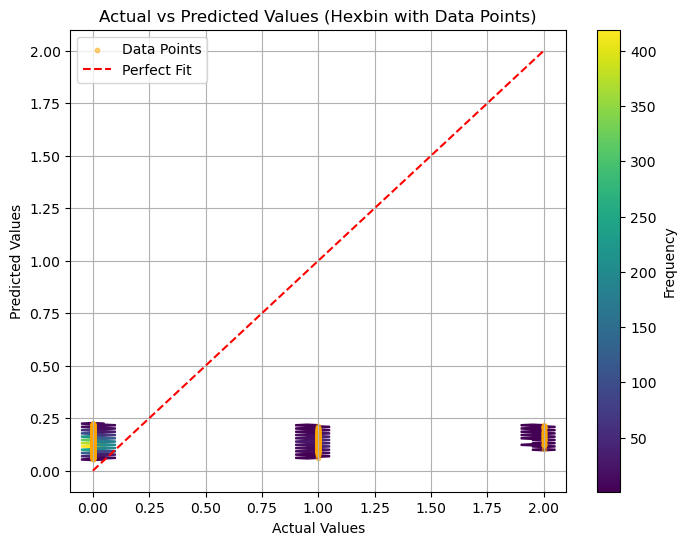

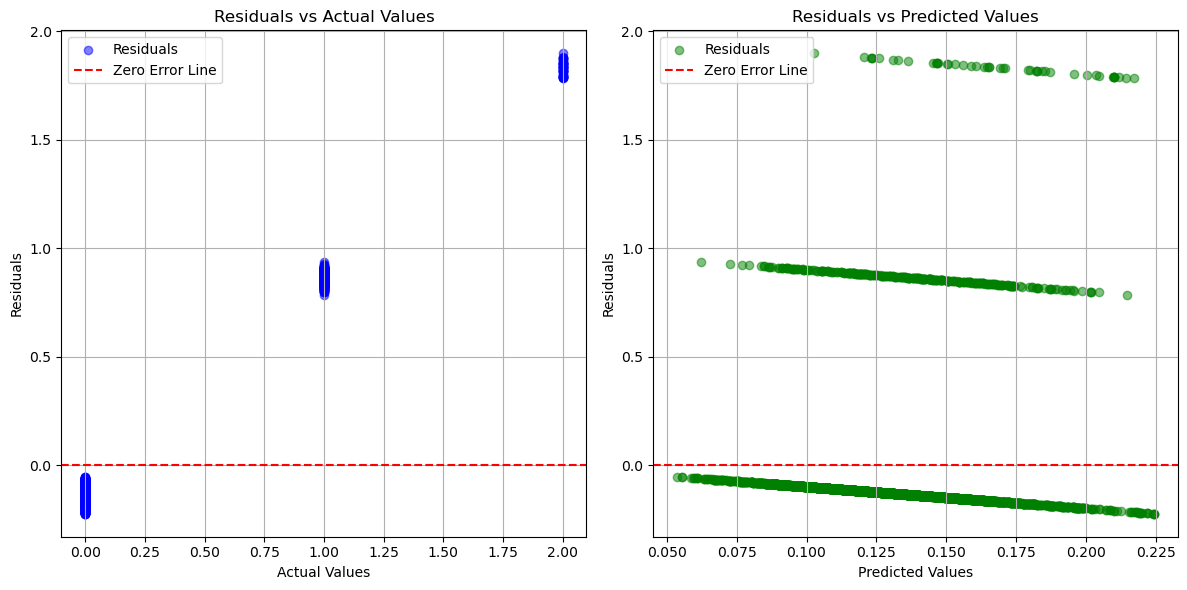

In [47]:
X_train, y_train, X_valid, y_valid, X_test, y_test = get_preprocessed_data()

nn = NeuralNetwork(
    hidden_neurons=10,  
    output_neurons=1,
    alpha=0.005,  
    epochs=50,  
    batch_size=16,  
    seed=42  
)
nn.fit(X_train, y_train, X_valid, y_valid)

y_pred = nn.predict(X_test)
test_rmse = rmse(y_test, y_pred)
print(f"Test RMSE: {test_rmse}")


# Create hexbin plot
plt.figure(figsize=(8, 6))
plt.hexbin(y_test, y_pred, gridsize=20, cmap='viridis', mincnt=1)  # Adjusted gridsize and colormap
plt.colorbar(label='Frequency')

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='orange', alpha=0.5, s=10, label='Data Points')  # Overlay points to enhance visibility

# Add the line for perfect fit (45-degree line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')

# Labels, title, and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Hexbin with Data Points)')
plt.legend()

# Show grid
plt.grid(True)

# Display plot
plt.show()

plot_residuals(y_test, y_pred)